# Confidence

In [1]:
import pandas as pd
import numpy as np

In [3]:
# df_h = pd.read_csv("../data_text/Hybrid_final_vs_splits/stages/H3_for_PUBLICATION_no_conflicts.csv")
df_h = pd.read_csv("C:/Users/N.Babakov/inappropriate-sensitive-topics/Inappropriateness_sensitive_topics_2.0/appropriateness/Appropriateness.csv")

In [4]:
len(df_h)

163332

In [5]:
len(df_h[df_h['human_labeled']==1]),len(df_h[df_h['human_labeled']==0])

(8822, 154510)

In [24]:
df_h_cut = df_h[(df_h['inappropriate']>0.8)|(df_h['inappropriate']<0.2)]
len(df_h_cut), len(df_h_cut)*0.85

(74376, 63219.6)

In [6]:
df_h.head()

,text,inappropriate,offline_crime,online_crime,drugs,gambling,pornography,prostitution,slavery,suicide,...,body_shaming,health_shaming,politics,racism,religion,sexual_minorities,sexism,social_injustice,human_labeled,toxic_auto
0,Начальники ДК и нынешнего места работы?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.09
1,"Читаю. Драки, грабежи, ДТП. Изредка убийства, ...",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.18
2,"Допустимо, если информация не нарушает правил ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.02
3,В больницу при приеме на работу тоже мед комис...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00
4,а зачем ты на проураинские митинги выходил? во...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.40


In [7]:
unsfae = list(df_h['inappropriate'])

In [8]:
unsfae_adj = [el if el >=0.5 else 1 - el for el in unsfae]

In [9]:
np.mean(unsfae_adj)

0.9320158327823085

In [10]:
np.median(unsfae_adj)

1.0

# Crowdosurce

In [15]:
df_cr = pd.read_csv("../data_text/Multi_crowdsource_all.csv")

In [16]:
df_cr.head()

,text,"Преступления (убийство, насилие, похищения, махинации), тюремная жизнь, судебные процессы","Преступления в интернете (взломы, обход блокировок,вирусы,пиратский контент, персональные данные, торренты)",Наркотики/табак/алкоголь,Азартные игры,Эротика/порнография/подробности половых актов/извращения,Проституция,"Рабство, торговля людьми/органами",Призывы к самоубийству/обсуждение способов самоубийства,Терроризм (призывы и подготовка к террактам/войнам),Оружие,Внешность/одежда человека,"Болезни, инвалидность, психические заболевания",Политика/исторические и современные конфликты/военная служба,"Расизм, национализм",Религия,"ЛГБТ (лесбиянки, гомосексуалисты, бисексуалы, траснегендеры)",Стереотипы о мужчинах/женщинах,"Социальное неравенство (деньги, образование, место жительства итд)"
0,"Нееет, родаки обязаны родив личинку дать ей об...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19,0.0,1.0,1.0,1.0
1,баба в мусульманских странах она не имеет прав...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,1.0,1.0
2,"Группа в основном толстая, хотя фотки настоящи...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00,0.0,0.0,1.0,1.0
3,Учи японский и едь в Японию там у них характер...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.79,0.0,0.0,1.0,1.0
4,но ведь в сборнике анекдотов конституции рахи ...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.0,0.0,1.0,1.0


In [17]:
columns_nec = list(df_cr.columns)[1:]

In [18]:
collected_condifences_raw = []
for c in columns_nec:
    curr_conf = list(df_cr[c])
    collected_condifences_raw.extend(curr_conf)

In [19]:
collected_condifences_adj = [el if el >=0.5 else 1 - el for el in collected_condifences_raw]

In [20]:
np.mean(collected_condifences_adj)

0.996626333724373

In [21]:
np.median(collected_condifences_adj)

1.0

# PIE CHART для топиков на семпл

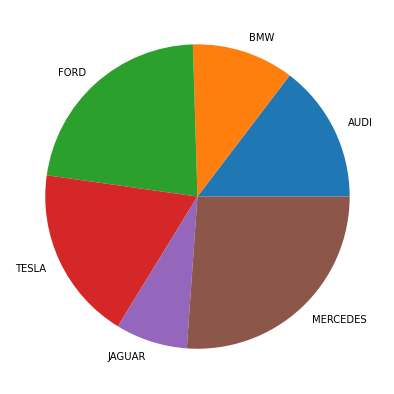

In [25]:
# Import libraries 
from matplotlib import pyplot as plt 
import numpy as np 


# Creating dataset 
cars = ['AUDI', 'BMW', 'FORD', 
		'TESLA', 'JAGUAR', 'MERCEDES'] 

data = [23, 17, 35, 29, 12, 41] 

# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels = cars) 

# show plot 
plt.show() 

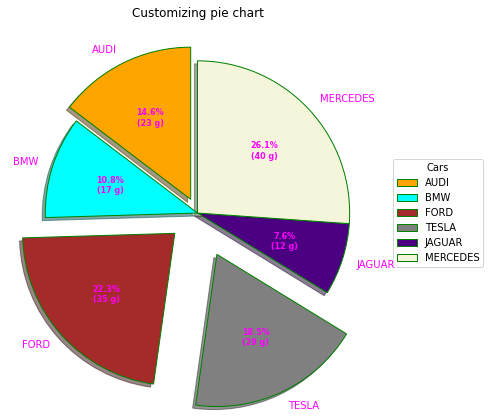

In [2]:
# Import libraries 
import numpy as np 
import matplotlib.pyplot as plt 


# Creating dataset 
cars = ['AUDI', 'BMW', 'FORD', 
		'TESLA', 'JAGUAR', 'MERCEDES'] 

data = [23, 17, 35, 29, 12, 41] 


# Creating explode data 
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0) 

# Creating color parameters 
colors = ( "orange", "cyan", "brown", 
		"grey", "indigo", "beige") 

# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 

# Creating autocpt arguments 
def func(pct, allvalues): 
	absolute = int(pct / 100.*np.sum(allvalues)) 
	return "{:.1f}%\n({:d} g)".format(pct, absolute) 

# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data, 
								autopct = lambda pct: func(pct, data), 
								explode = explode, 
								labels = cars, 
								shadow = True, 
								colors = colors, 
								startangle = 90, 
								wedgeprops = wp, 
								textprops = dict(color ="magenta")) 

# Adding legend 
ax.legend(wedges, cars, 
		title ="Cars", 
		loc ="center left", 
		bbox_to_anchor =(1, 0, 0.5, 1)) 

plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Customizing pie chart") 

# show plot 
plt.show() 


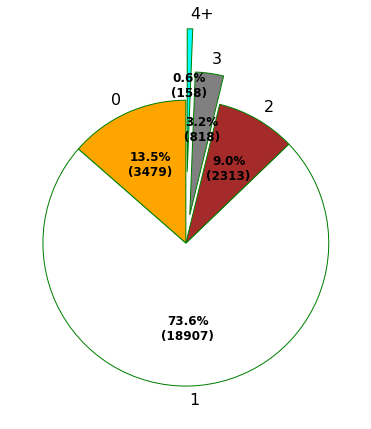

In [27]:


# Creating dataset 
# cars = [0, 1, 2, 3, '4+'] 
cars = [0, 1, 2, 3, '4+'] 

data = [3479, 18908, 2313, 819, 145+13] 


# Creating explode data 
explode = (0.0, 0.0, 0.0, 0.2, 0.5) 

# Creating color parameters 
colors = ( "orange", "white", "brown", 
		"grey", "cyan") 

# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 

# Creating autocpt arguments 
def func(pct, allvalues): 
	absolute = int(pct / 100.*np.sum(allvalues)) 
	return "{:.1f}%\n({:d})".format(pct, absolute) 

# Creating plot 
fig, ax = plt.subplots(figsize =(10, 6)) 
wedges, texts, autotexts = ax.pie(data, 
								autopct = lambda pct: func(pct, data), 
								explode = explode, 
								labels = cars, 
								shadow = False, 
								colors = colors, 
								startangle = 90, 
								wedgeprops = wp, 
								textprops = dict(color ="black"))#, pctdistance=1.1, labeldistance=1.2) #1.2

# Adding legend 
# ax.legend(wedges, cars, 
# 		title ="Topics per sample", 
# 		loc ="upper left", 
# 		bbox_to_anchor =(1, 0, 0.5, 1)) 

for txt in texts:
    txt.set_fontsize(16)
    
plt.setp(autotexts, size = 12, weight ="bold") 
# ax.set_title("Customizing pie chart") 
plt.tight_layout()
# show plot 
# plt.show() 
plt.savefig("piechart.eps",format='eps')

In [40]:
cars = [0, 1, 2, 3, 'gt4'] 
data = [3479, 18908, 2313, 819, 145+13] 
df_count_sample = pd.DataFrame({'count':cars,'number':data})

In [41]:
df_count_sample

,count,number
0,0,3479
1,1,18908
2,2,2313
3,3,819
4,gt,158


<AxesSubplot:ylabel='Appropriateness'>

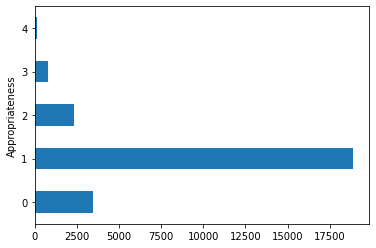

In [42]:
df_count_sample['number'].plot( kind='barh', xlabel = 'Appropriateness', ylabel = 'count')


In [4]:
texts

[Text(-0.49550336198919054, 1.0929210485014045, '0'),
 Text(0.02774658783684061, -1.19967917663991, '1'),
 Text(0.5984099719222654, 1.04014686727596, '2'),
 Text(0.1937906843850356, 1.386522690274335, '3'),
 Text(0.032861371054436934, 1.6996823615877241, '4+')]

In [48]:
data

[3479, 18908, 2313, 819, 158]

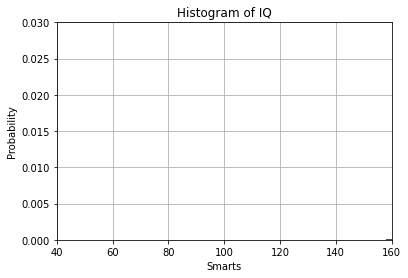

In [49]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Fixing random state for reproducibility
# np.random.seed(19680801)

# mu, sigma = 100, 15
# x = mu + sigma * np.random.randn(10000)

# # the histogram of the data
# n, bins, patches = plt.hist(data, 4, density=True, facecolor='g')#, alpha=0.75


# plt.xlabel('Smarts')
# plt.ylabel('Probability')
# plt.title('Histogram of IQ')
# # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(40, 160)
# plt.ylim(0, 0.03)
# plt.grid(True)
# plt.show()

In [69]:
from collections import Counter

In [26]:
lbl_per_cnt = [0, 1, 2, 3, '4+'] 
data = [3479, 18908, 2313, 819, 145+13] 
data_adj = []
for lpc,cnt in zip(lbl_per_cnt,data):
    print(lpc,cnt)
    adj_curr_list = [lpc] * cnt
    data_adj.extend(adj_curr_list)


0 3479
1 18908
2 2313
3 819
4+ 158


In [27]:
Counter(data_adj)

NameError: name 'Counter' is not defined

In [94]:
len(data_adj)

25677

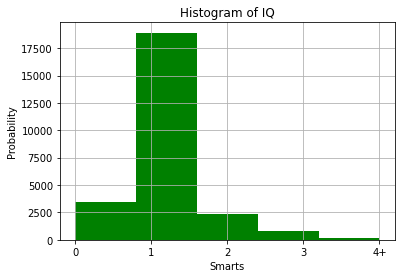

In [28]:
n, bins, patches = plt.hist(data_adj, 5, density=False, facecolor='g')

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(0, 10)
# plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

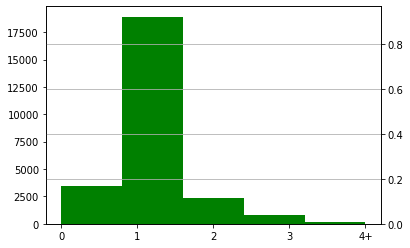

In [29]:
fig, ax = plt.subplots()
n, bins, patches = plt.hist(data_adj, 5, density=False, facecolor='g')
ax2 = ax.twinx()
plt.sca(ax2)
n, bins, patches = plt.hist(data_adj, 5, density=True, facecolor='g')

plt.grid(True)
plt.show()

fig.savefig("topcis_per_sample.pdf",format='pdf')

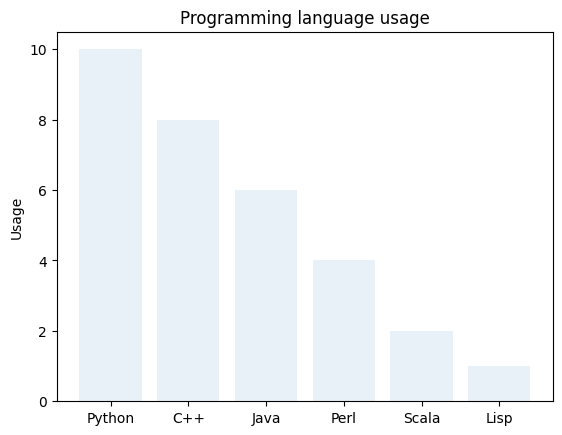

In [4]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.1)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

In [111]:
data

[3479, 18908, 2313, 819, 158]

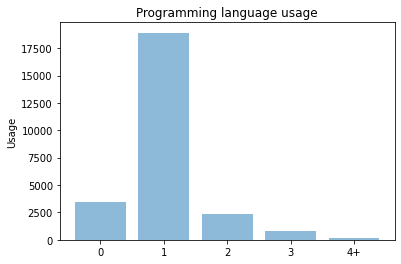

In [30]:
objects = lbl_per_cnt
y_pos = np.arange(len(data))
performance = data

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

In [32]:
data_pcnt = [round(el/sum(data),2) for el in data]

In [33]:
data_pcnt

[0.14, 0.74, 0.09, 0.03, 0.01]

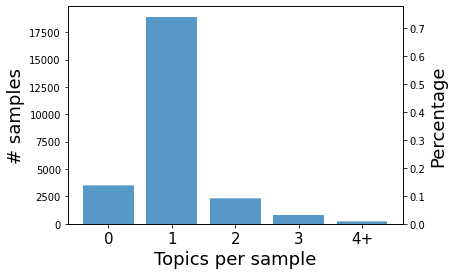

In [54]:
fig, ax = plt.subplots()

objects = lbl_per_cnt
y_pos = np.arange(len(data))
performance = data

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.rc('xtick', labelsize=15)
plt.xlabel('Topics per sample', fontsize=18)
plt.ylabel('# samples', fontsize=18)

ax2 = ax.twinx()
plt.sca(ax2)
plt.bar(y_pos, data_pcnt, align='center', alpha=0.5)

plt.ylabel('Percentage', fontsize=18)
# plt.title('Programming language usage')

fig.savefig("topcis_per_sample.pdf",format='pdf', bbox_inches='tight')

In [99]:
n

array([0.13549091, 0.73637886, 0.09008062, 0.03804962])

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
# fig, ax = plt.subplots()


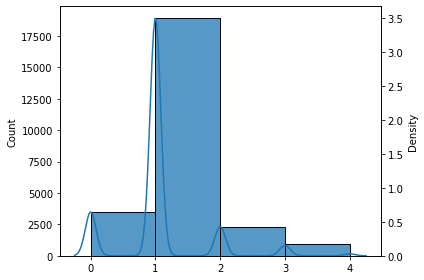

In [91]:
fig, ax = plt.subplots()
sns.histplot(data_adj, bins=4)
ax2 = ax.twinx()
sns.kdeplot(data_adj, ax=ax2)
plt.tight_layout()
plt.show()

# Words per sentence

In [5]:
import pandas as pd
import re
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
df_multi = pd.read_csv("../data_text/crowd_vs_part123self.csv")

df_hybrid = pd.read_csv("../data_text/HYBRID_ST123_CLEANED_FINAL.csv")


In [5]:
def round_up(val):
    if float(val) > 0.5:
        return 1
    return 0

In [6]:
df_count = pd.DataFrame()
for c in df_multi.columns:
    if c != 'text':
        df_count[c] = df_multi[c].apply(round_up)
    else:
        df_count[c] = df_multi[c]

In [51]:
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25679 entries, 0 to 25678
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   text                 25679 non-null  object
 1   crime_real           25679 non-null  int64 
 2   crime_web            25679 non-null  int64 
 3   drugs                25679 non-null  int64 
 4   gambling             25679 non-null  int64 
 5   pornography          25679 non-null  int64 
 6   prostitution         25679 non-null  int64 
 7   slavery              25679 non-null  int64 
 8   suicide              25679 non-null  int64 
 9   terrorism            25679 non-null  int64 
 10  weapons              25679 non-null  int64 
 11  body_shaming         25679 non-null  int64 
 12  halth_shaming        25679 non-null  int64 
 13  politics             25679 non-null  int64 
 14  racism               25679 non-null  int64 
 15  religion             25679 non-null  int64 
 16  sex_

In [10]:
df_count_hybrid = pd.DataFrame()
for c in df_multi.columns:
    if c != 'text':
        df_count_hybrid[c] = df_hybrid[c].apply(round_up)
    else:
        df_count_hybrid[c] = df_hybrid[c]

In [11]:
topics = list(df_count.columns)[1:19]

In [12]:
topics

['crime_real',
 'crime_web',
 'drugs',
 'gambling',
 'pornography',
 'prostitution',
 'slavery',
 'suicide',
 'terrorism',
 'weapons',
 'body_shaming',
 'halth_shaming',
 'politics',
 'racism',
 'religion',
 'sex_minorities',
 'sexism',
 'social']

In [13]:
df_count.head()

,text,crime_real,crime_web,drugs,gambling,pornography,prostitution,slavery,suicide,terrorism,weapons,body_shaming,halth_shaming,politics,racism,religion,sex_minorities,sexism,social
0,РРРРРРЯЯЯЯЯЯЯ РУССКИЕ ВАНЬКИ НИКОМУ НЕ НУЖНЫ!!...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,"По моему, быдло тот кто осуждает чужие предпоч...",0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
2,Бабы это вообще безхуйные сиськастые ссущие си...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,изнасиловалиа говорила что девственницаЯ так д...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,"и что ? не сосут только уебищные тни, видосов ...",0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [14]:
def get_words_count(text):
    text_adjusted = re.sub('[^а-яА-яa-zA-z ]', ' ', text)
    text_adjusted = re.sub(' +', ' ', text_adjusted)
    return len(text_adjusted.split())
get_words_count(df_count.iloc[0]['text'])

17

In [15]:
def get_words_count_cluster(count):
    if count <= 10:
        return '0-10'
    elif count > 10 and count <= 20:
        return '11-20'
    elif count > 21 and count <= 30:
        return '21-30'
    elif count > 31 and count <= 40:
        return '31-40'
    elif count > 41 and count <= 50:
        return '41-50'
    else:
        return '51+'

df_count['wc'] = df_count['text'].apply(get_words_count)  
df_count['word count clusters'] = df_count['wc'].apply(get_words_count_cluster)

df_count_hybrid['wc'] = df_count_hybrid['text'].apply(get_words_count)  
df_count_hybrid['word count clusters'] = df_count_hybrid['wc'].apply(get_words_count_cluster)

In [ ]:
# plot_hyb = df_count['word count clusters'].value_counts().plot(kind='barh', xlabel = 'words per sample', ylabel = 'count')
# fig_hyb = plot_hyb.get_figure()

In [ ]:
df_count['word count clusters'].value_counts()

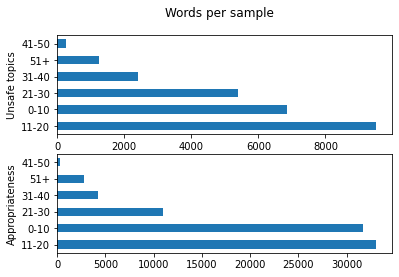

In [18]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Words per sample')
df_count['word count clusters'].value_counts().plot(ax=axes[0],kind='barh', xlabel = 'Unsafe topics', ylabel = 'count')
df_count_hybrid['word count clusters'].value_counts().plot(ax=axes[1], kind='barh', xlabel = 'Appropriateness', ylabel = 'count')
fig.savefig("wordcount_hybrid_and_multi.eps",format='eps')

# Average overall

In [49]:
np.mean(list(df_count['wc'])),np.median(list(df_count['wc']))

(18.12625102223607, 16.0)

In [50]:
np.mean(list(df_count_hybrid['wc'])),np.median(list(df_count_hybrid['wc']))

(14.977373927524164, 13.0)

# Average by topic

In [54]:
for c in df_multi.columns:
    if c != 'text':
        df_count_multi_topic = df_count[df_count[c]==1]
        print(c,
              round(np.median(list(df_count_multi_topic['wc'])),2),
                    round(np.mean(list(df_count_multi_topic['wc'])),2))

crime_real 15.0 16.71
crime_web 16.0 18.04
drugs 17.0 18.59
gambling 20.0 21.67
pornography 13.0 15.27
prostitution 14.0 16.71
slavery 13.0 15.8
suicide 19.0 20.15
terrorism 15.0 16.92
weapons 17.0 17.89
body_shaming 11.0 14.05
halth_shaming 17.0 18.49
politics 15.0 17.21
racism 15.0 16.63
religion 19.0 20.24
sex_minorities 18.0 19.61
sexism 14.0 16.42
social 15.0 17.45


# Unique words

In [25]:
from tqdm import tqdm

In [39]:
def get_words_set(text):
    text = str(text)
    
    text_adjusted = re.sub('[^а-яА-яa-zA-z ]', ' ', text)
    text_adjusted = re.sub(' +', ' ', text_adjusted)
    text_adjusted = text_adjusted.lower()
    unique_words_set = set(text_adjusted.split())
    return unique_words_set

In [32]:
multi_text = ''.join(list(df_multi['text']))

In [36]:
multi_text[100:304]

'АЙТЕ БЬЮТИФУЛПИПЛ СКОЗАЛИ!!!1По моему, быдло тот кто осуждает чужие предпочтения.А тёлки которые просто ебутся-бляди. Проиграл с двуличного лицемера.Бабы это вообще безхуйные сиськастые ссущие сидя сущест'

In [40]:
multi_set = get_words_set(multi_text)

In [41]:
multi_set

{'гипоалергенную',
 'кремова',
 'хайкика',
 'сохранившимся',
 'лопается',
 'определят',
 'едь',
 'стреляет',
 'шкафу',
 'ебльнику',
 'ценнике',
 'попрошайничество',
 'фанатичных',
 'затычка',
 'медосмотры',
 'разбрасоватбсало',
 'воспитал',
 'личному',
 'лестью',
 'b',
 'властьу',
 'тудавполне',
 'корректор',
 'дозы',
 'компенсация',
 'дыхательной',
 'местнх',
 'каморы',
 'еякуляции',
 'женскую',
 'производственном',
 'плагиатирована',
 'забивая',
 'сварганивший',
 'урвал',
 'упругую',
 'окружи',
 'упование',
 'достиг',
 'пророку',
 'ебалупситеррор',
 'гипотетически',
 'мужски',
 'повстречался',
 'kahr',
 'ригелей',
 'ипц',
 'темная',
 'лудоманииэто',
 'лутшие',
 'ширяев',
 'кретины',
 'кго',
 'обесточатся',
 'нашид',
 'максимумне',
 'пидарашка',
 'мое',
 'грибочки',
 'наркозависимым',
 'дистантных',
 'лахова',
 'ебанутой',
 'вечных',
 'произнесет',
 'бега',
 'кецалькоатль',
 'все',
 'спидозных',
 'большой',
 'наркоманчиками',
 'задежек',
 'получаю',
 'совкопенсионеры',
 'рочить',
 'на

In [42]:
len(multi_set)

76095

In [26]:
# unique_multi_set = set()
# for i, el in tqdm(df_multi.iterrows(), total = len(df_multi)):
#     sample_words_set = get_words_set(el['text'])
#     unique_multi_set = unique_multi_set.union(sample_words_set)

100%|███████████████████████████████████████████████████████████████████████████| 25679/25679 [01:49<00:00, 233.53it/s]


In [28]:
len(unique_multi_set)

81085

In [44]:
hybrid_text = ''.join(list(df_hybrid['text']))
hybrid_set = get_words_set(hybrid_text)
len(hybrid_set)

155674